In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from scipy.stats import norm
from scipy.io import savemat
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression  # Example model
from sklearn.metrics import accuracy_score  # Example evaluation metric

In [6]:
class Preprocessing:
    def __init__(self, file_path, save_path):
        self.file_path = file_path
        self.save_path = save_path
        self.df = None
        self.X = None
        self.y = None
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=0.95)
        self.df_enhanced = None

    def load_data(self):
        try:
            self.df = pd.read_csv(self.file_path)
            self.df = self.df[self.df['survival_time'] <= 1280]
        except FileNotFoundError:
            print(f"File not found: {self.file_path}")
        except pd.errors.EmptyDataError:
            print("No data found in the file.")
        except Exception as e:
            print(f"An error occurred: {e}")

    def feature_engineering(self):
        def apply_nan_if_negative(x):
            return x if x >= 0 else np.nan

        self.df['growth'] = self.df['growth'].apply(apply_nan_if_negative)
        self.df['Infiltration'] = self.df['Infiltration'].apply(apply_nan_if_negative)
        self.df['Time'] = self.df['Time'].apply(apply_nan_if_negative)
        self.df['mu1'] = np.sqrt(self.df['growth'] * self.df['Time'])
        self.df['mu2'] = np.sqrt(self.df['Infiltration'] * self.df['Time'])
        self.df['Vol_rat'] = self.df['Vol_FL'] / self.df['Vol_T1']
        self.df['Vol_rat2'] = self.df['Vol_T1'] / self.df['Vol_FL']
        self.df['mu1/mu2'] = self.df['mu1'] / self.df['mu2']
        self.df['mu2/mu1'] = self.df['mu2'] / self.df['mu1']

    def X_and_Y(self):
        self.df['LAST_MR'] = self.df['LAST_MR'] / 30
        self.y = self.df['LAST_MR']
        self.X = self.df.drop(columns=[
            'patient', 'LAST_MR', 'growth', 'survival_time', 'Infiltration', 'Age', 
            'sex', 'Total_resection', 'Time', 'X', 'Y', 'Z', 'mu1', 'mu2', 'Vol_FL', 
            'Vol_T1', 'Vol_rat', 'Vol_rat2', 'mu1/mu2', 'mu2/mu1', 'Vol_Nec'
        ])

    def scale_and_apply_pca_with_loocv(self):
        # Initialize LOOCV
        loo = LeaveOneOut()
        accuracies = []

        # Iterate over each split
        for train_index, test_index in loo.split(self.X):
            # Split data
            X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
            y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]

            # Scale the data
            X_train_scaled = self.scaler.fit_transform(X_train)
            X_test_scaled = self.scaler.transform(X_test)

            # Apply PCA
            X_train_pca = self.pca.fit_transform(X_train_scaled)
            X_test_pca = self.pca.transform(X_test_scaled)

            # Train the model (using Logistic Regression as an example)
            model = LogisticRegression()
            model.fit(X_train_pca, y_train)

            # Predict and evaluate
            y_pred = model.predict(X_test_pca)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)

        # Calculate average accuracy
        average_accuracy = np.mean(accuracies)
        print(f"Average accuracy over LOOCV: {average_accuracy}")

    def preprocess(self):
        self.load_data()
        self.feature_engineering()
        self.X_and_Y()
        avg_accuracy = self.evaluate_with_loocv()
        return avg_accuracy

# Usage
file_path = 'path_to_your_data.csv'
save_path = 'path_to_save_enhanced_data.csv'
preprocessor = Preprocessing(file_path, save_path)
avg_accuracy = preprocessor.preprocess()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 39)

In [ ]:
# Initialize preprocessing
preprocessing = Preprocessing(file_path='path_to_your_dataset.csv', save_path='enhanced_dataset.csv', test_patient='patient_id')
preprocessing.preprocess()

# Validate new patient data
X_new_patient_pca = preprocessing.validate_new_patient(new_patient_data)

# Initialize ModelEvaluator
model_evaluator = ModelEvaluator(preprocessing.X, preprocessing.y)

# Get predictions for the new patient
new_patient_predictions = model_evaluator.validate_new_patient(X_new_patient_pca)
print(new_patient_predictions)

In [7]:
# Extract features and target for model evaluation
X = df_enhanced.drop(columns=['patient','growth','LAST_MR','survival_time',"Infiltration",'Time','Vol_FL','Vol_T1','mu1','mu2','mu1/mu2','PC1','PC2','PC2','PC5','PC6','PC7','PC10','PC11','PC12','Vol_rat2','Vol_rat'])
y = df_enhanced['LAST_MR']
X.head()

,PC3,PC4,PC8,PC9,Age,sex,Total_resection,X,Y,Z,mu2/mu1,Vol_Nec
0,25.953309,-7.933351,13.590993,-3.669446,52,1,95.0,0.650,0.332,0.463,0.474432,1.470
1,7.922481,-5.421262,-8.762371,-0.181086,46,0,60.0,0.422,0.470,0.450,0.059287,30.670
2,-6.202525,-7.795802,5.236915,-11.256885,62,0,20.0,0.577,0.478,0.294,1.430863,33.145
3,-2.804149,7.349889,2.896664,-6.898615,72,0,95.0,0.422,0.472,0.452,0.060751,5.416
4,2.131116,7.194441,2.950203,2.461732,55,1,98.0,0.442,0.279,0.292,0.666667,35.087


Model: Linear Regression, MSE: 162.5717
Model: Lasso, MSE: 22.9734
Model: Decision Tree, MSE: 37.8363
Model: Random Forest, MSE: 38.0994
Model: Gradient Boosting, MSE: 60.5611
Model: SVR, MSE: 56.0241
Model: KNN, MSE: 38.2400
Model: XGBoost, MSE: 48.0827
Standard Deviation of residuals for Lasso: 4.7914
PDF data saved to pdf_data.mat
Model: Linear Regression, MSE: 162.5717
Model: Lasso, MSE: 22.9734
Model: Decision Tree, MSE: 37.8363
Model: Random Forest, MSE: 38.0994
Model: Gradient Boosting, MSE: 60.5611
Model: SVR, MSE: 56.0241
Model: KNN, MSE: 38.2400
Model: XGBoost, MSE: 48.0827
Standard Deviation of residuals for Lasso: 4.7914


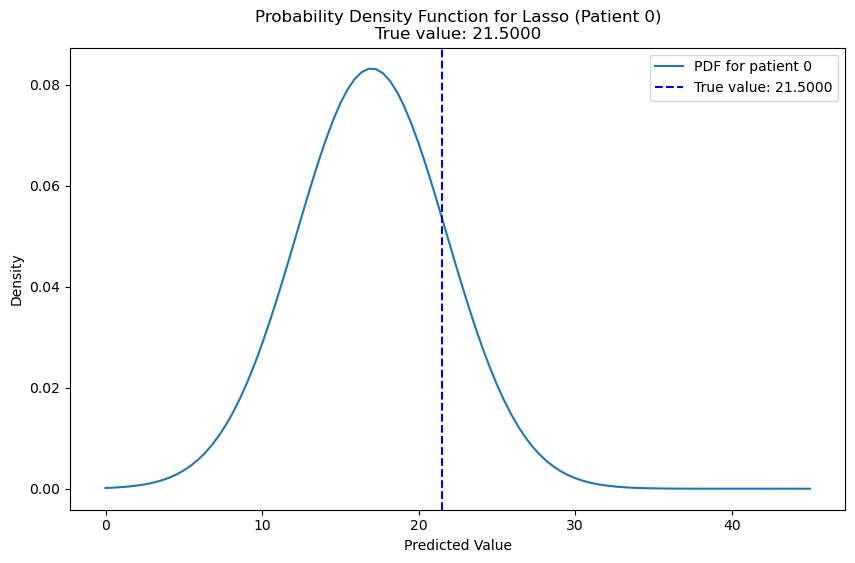

In [8]:
evaluator = ModelEvaluator(X, y)

# Save PDF data for all patients
evaluator.save_all_pdf_data("Lasso")

# Plot PDF for a specific patient
evaluator.plot_pdf("Lasso", patient_index=0)


Model: Linear Regression, MSE: 64.1532
Model: Lasso, MSE: 27.0903
Model: Decision Tree, MSE: 37.2633
Model: Random Forest, MSE: 39.1851
Model: Gradient Boosting, MSE: 56.1042
Model: SVR, MSE: 57.7134
Model: KNN, MSE: 44.4253
Model: XGBoost, MSE: 47.3949
Standard Deviation of residuals for Lasso: 5.2007


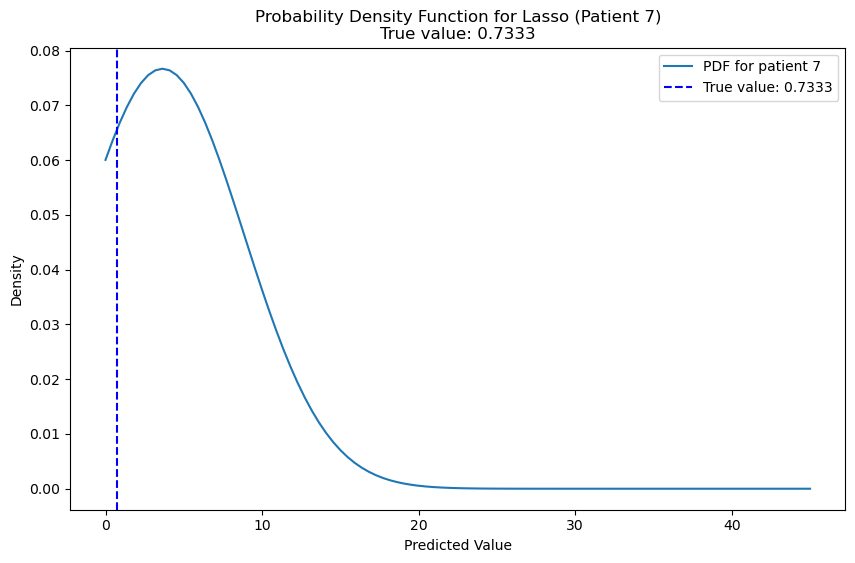

Model: Linear Regression, MSE: 64.1532
Model: Lasso, MSE: 27.0903
Model: Decision Tree, MSE: 37.2633
Model: Random Forest, MSE: 39.1851
Model: Gradient Boosting, MSE: 56.1042
Model: SVR, MSE: 57.7134
Model: KNN, MSE: 44.4253
Model: XGBoost, MSE: 47.3949
Standard Deviation of residuals for Lasso: 5.2007
PDF data saved to pdf_data.mat


In [83]:
evaluator.plot_pdf("Lasso", patient_index=7)
evaluator.save_all_pdf_data("Lasso")